In [1]:
import numpy as np
from rubin_scheduler.site_models import (
    Almanac,
    CloudData)
from astropy.time import Time
from rubin_scheduler.utils import (
    DEFAULT_NSIDE,
    SURVEY_START_MJD,)

from astropy.coordinates import AltAz, EarthLocation, get_body, get_sun

from rubin_scheduler.utils import Site

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
cloud_data = CloudData(Time(SURVEY_START_MJD, format="mjd"))

In [3]:
cloud_data

In [4]:
almanac = Almanac(mjd_start=SURVEY_START_MJD)

In [5]:
almanac

In [6]:
# Compute every 30 min
mjds = np.arange(SURVEY_START_MJD, SURVEY_START_MJD+3652, 1/24/2)

In [7]:
times = Time(mjds, format="mjd")

In [8]:
# When is the sun up?
site = Site("LSST")
location = EarthLocation(lat=site.latitude, lon=site.longitude, height=site.height)

sun = get_sun(times)
aa = AltAz(location=location, obstime=times)
sun_aa = sun.transform_to(aa)

/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 119832 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 119832 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 119832 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [9]:
sun_down = np.where(sun_aa.alt.deg < -12)[0]

In [10]:
mjds_dark = mjds[sun_down]

In [11]:
cloud_levels = cloud_data(times[sun_down])

/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 50626 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


(array([41337.,  6424.,  4859.,  3283.,     0.,  2840.,  2262.,  2498.,
         2778.,  7440.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

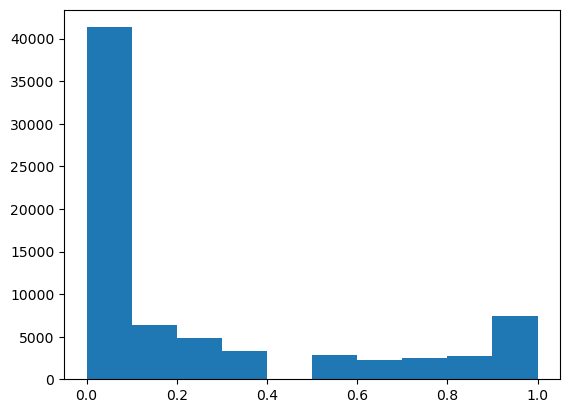

In [12]:
plt.hist(cloud_levels)

In [13]:
np.where(cloud_levels >= 0.3)[0].size

21101

In [14]:
np.where(cloud_levels >= 0.1)[0].size

32384

In [15]:
cloud_levels.size

73721

In [16]:
print("with 0.3 (baseline) cutoff, %f%% of times closed" % (np.where(cloud_levels >= 0.3)[0].size/cloud_levels.size*100))

with 0.3 (baseline) cutoff, 28.622780% of times closed


In [17]:
print("with 0.1 cutoff, %f%% of times closed" % (np.where(cloud_levels >= 0.1)[0].size/cloud_levels.size*100))

with 0.1 cutoff, 43.927782% of times closed
